### Question 1

### Part b

In [6]:
n_1 = 4.572153 
n_2 = 1.1622475
n_3 = 0.014251
n_4 = 0.00125
Q_t = 0.05
total_n = n_1 + n_2 + n_3 + n_4
alpha_1 = n_1 / total_n
alpha_2 = n_2 / total_n
alpha_3 = n_3 / total_n
alpha_4 = n_4 / total_n
alpha_total = alpha_1 + (2* alpha_2) + (3 * alpha_3) + (4 * alpha_4)

Q_1 = alpha_1 * Q_t / alpha_total
Q_2 = alpha_2 * Q_t / (3*alpha_total)
Q_3 = alpha_3 * Q_t / (3*alpha_total)
Q_4 = alpha_4 * Q_t / alpha_total
Q_F = 6 * Q_1**2 + 6 * Q_2 + 4 * Q_3 + Q_4

print(Q_F)

0.023384522084901493


There is a slight difference between my calculation and the answer here after 0.02338....   Which is due to the fact that I used approximate numbers on paper when calculating which would affect the results

### Part c

In [7]:
import numpy as np
from scipy.stats import beta, triang, uniform

# Step 1: Create distributions for failure rates of basic events
dist_Qt = beta(a=10, b=390)
dist_n1 = triang(c=0.4, loc=3, scale=4.5)  # c is (mode - loc) / scale
dist_n2 = triang(c=0.5, loc=2, scale=4.1)  # c is (mode - loc) / scale
dist_n3 = uniform(loc=1.2, scale=1.8)
dist_n4 = uniform(loc=0.5, scale=1.6)

# Step 2: Create risk model function
def risk_model(Q_t, n1, n2, n3, n4):
    total_n = n1 + n2 + n3 + n4
    alpha_1 = n1 / total_n
    alpha_2 = n2 / total_n
    alpha_3 = n3 / total_n
    alpha_4 = n4 / total_n
    alpha_total = alpha_1 + 2* alpha_2 + 3 * alpha_3 + 4 * alpha_4

    Q_1 = alpha_1 * Q_t / alpha_total
    Q_2 = alpha_2 * Q_t / (3*alpha_total)
    Q_3 = alpha_3 * Q_t / (3*alpha_total)
    Q_4 = alpha_4 * Q_t / alpha_total

    return 6 * Q_1**2 + 6 * Q_2 + 4 * Q_3 + Q_4


# Step 3: Set up the required computation parameters
n_simulations = 10000000

# Step 4: Generate a matrix of random numbers
random_matrix = np.random.rand(n_simulations, 5)

# Step 5: Inverse transform
Pr_Qt = dist_Qt.ppf(random_matrix[:, 0])
Pr_n1 = dist_n1.ppf(random_matrix[:, 1])
Pr_n2 = dist_n2.ppf(random_matrix[:, 2])
Pr_n3 = dist_n3.ppf(random_matrix[:, 3])
Pr_n4 = dist_n4.ppf(random_matrix[:, 4])

# Step 6: Define a matrix C_i
C_i = np.array([Pr_Qt, Pr_n1, Pr_n2, Pr_n3, Pr_n4]).T

# Step 7: Complete the model outputs using C_i matrices
T = risk_model(C_i[:, 0], C_i[:, 1], C_i[:, 2], C_i[:, 3], C_i[:, 4])

# Calculate the mean and 95th percentile of T
mean = np.mean(T)
percentile_95 = np.percentile(T, 95)

# Print the results
print(f'Mean total probability of Major Damage: {mean}')
print(f'95th percentile of total probability of Major Damage: {percentile_95}')

Mean total probability of Major Damage: 0.012534727375501023
95th percentile of total probability of Major Damage: 0.020013671751935726


The Alpha Factor Method is a technique used in risk assessment to calculate the failure rate of a system based on the failure rates of its components. It's a deterministic method, meaning it uses fixed values for the failure rates, rather than treating them as random variables.

In the code, the Alpha Factor Method seems to be used within the risk_model function to calculate the risk metric (T) for a given set of failure rates $(Q_t, n1, n2, n3, n4)$. The failure rates are weighted by their alpha factors $(\alpha_1, \alpha_2, \alpha_3, \alpha_4)$, and these weighted failure rates are then used to calculate $Q_1, Q_2, Q_3, Q_4$, which are then used to calculate T.

The Monte Carlo simulation in the code is a way to account for the uncertainty in the failure rates. Instead of using fixed values for the failure rates, it generates a large number of random samples from the distributions of the failure rates, calculates the risk metric for each sample using the Alpha Factor Method, and then calculates the mean and 95th percentile of these risk metrics.

The value calculated using the Alpha Factor Method (0.023384522084901493) is the risk metric for a specific set of failure rates. The mean and 95th percentile calculated by the Monte Carlo simulation are summary statistics of the risk metrics for a large number of possible sets of failure rates.

In other words, the value calculated is a single point estimate of the risk, while the results of the Monte Carlo simulation give a sense of the distribution of the risk under uncertainty in the failure rates.

Confidence interval for the mean: (0.01252851370325113, 0.012533619622383469)
Confidence interval for the 95th percentile: (0.019987863019045978, 0.020034049214239406)


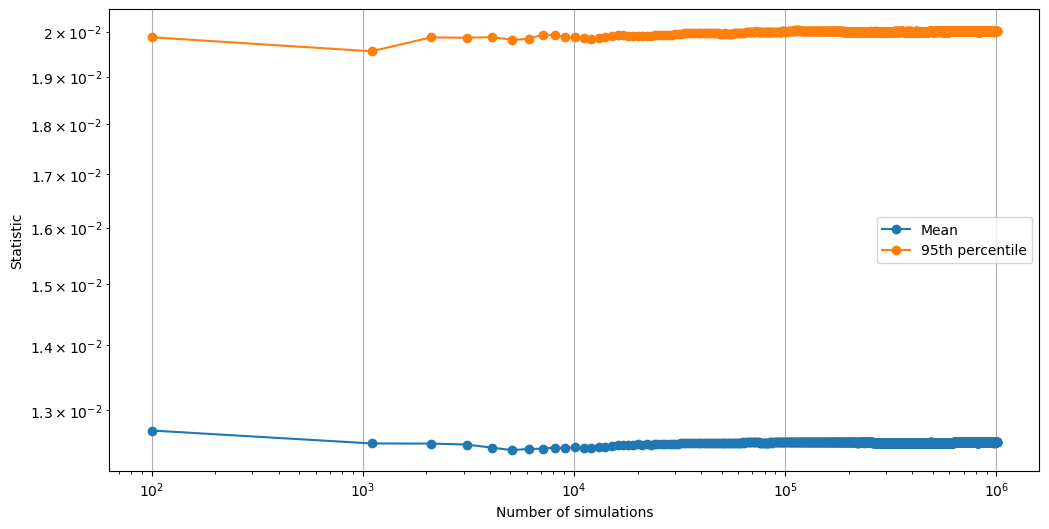

Relative change in mean: [-1.46001848e-02 -1.72214061e-04 -1.06762324e-03 ...  4.60641437e-07
  4.02982221e-06  1.50831851e-05]
Relative change in 95th percentile: [-1.58727809e-02  1.59407202e-02 -3.73670881e-04 ...  2.72334192e-06
  3.07349053e-05  3.51004209e-05]


In [8]:
import numpy as np
from scipy import stats
from scipy.stats import beta, triang, uniform
import matplotlib.pyplot as plt

# Step 1: Create distributions for failure rates of basic events
dist_Qt = beta(a=10, b=390)
dist_n1 = triang(c=0.4, loc=3, scale=4.5)  # c is (mode - loc) / scale
dist_n2 = triang(c=0.5, loc=2, scale=4.1)  # c is (mode - loc) / scale
dist_n3 = uniform(loc=1.2, scale=1.8)
dist_n4 = uniform(loc=0.5, scale=1.6)

# Step 2: Create risk model function
def risk_model(Q_t, n1, n2, n3, n4):
    total_n = n1 + n2 + n3 + n4
    alpha_1 = n1 / total_n
    alpha_2 = n2 / total_n
    alpha_3 = n3 / total_n
    alpha_4 = n4 / total_n
    alpha_total = alpha_1 + 2* alpha_2 + 3 * alpha_3 + 4 * alpha_4

    Q_1 = alpha_1 * Q_t / alpha_total
    Q_2 = alpha_2 * Q_t / (3*alpha_total)
    Q_3 = alpha_3 * Q_t / (3*alpha_total)
    Q_4 = alpha_4 * Q_t / alpha_total

    return 6 * Q_1**2 + 6 * Q_2 + 4 * Q_3 + Q_4

# Step 3: Set up the required computation parameters
n_simulations = int(1E7)  # maximum simulation size

# Step 4: Generate a matrix of random numbers
random_matrix = np.random.rand(n_simulations, 5)

# Step 5: Inverse transform
Pr_Qt = dist_Qt.ppf(random_matrix[:, 0])
Pr_n1 = dist_n1.ppf(random_matrix[:, 1])
Pr_n2 = dist_n2.ppf(random_matrix[:, 2])
Pr_n3 = dist_n3.ppf(random_matrix[:, 3])
Pr_n4 = dist_n4.ppf(random_matrix[:, 4])

# Step 6: Define a matrix C_i
C_i = np.array([Pr_Qt, Pr_n1, Pr_n2, Pr_n3, Pr_n4]).T

# Step 7: Complete the model outputs using C_i matrices
T = risk_model(C_i[:, 0], C_i[:, 1], C_i[:, 2], C_i[:, 3], C_i[:, 4])

# Define a range of simulation sizes
simulation_sizes = np.arange(100, 1010000, 1000)

# Initialize lists to store the means and 95th percentiles
means = []
percentiles_95 = []

# For each simulation size
for n_simulations in simulation_sizes:
    # Calculate the mean and 95th percentile of T
    mean = np.mean(T[:n_simulations])
    percentile_95 = np.percentile(T[:n_simulations], 95)
    means.append(mean)
    percentiles_95.append(percentile_95)

# Calculate the confidence interval for the mean
confidence_level = 0.95
degrees_of_freedom = n_simulations - 1
sample_mean = np.mean(T)
sample_standard_error = stats.sem(T)
confidence_interval = stats.t.interval(confidence_level, degrees_of_freedom, sample_mean, sample_standard_error)

print(f'Confidence interval for the mean: {confidence_interval}')

# Calculate the confidence interval for the 95th percentile
percentile_95 = np.percentile(T, 95)
bootstrap_percentiles_95 = [np.percentile(np.random.choice(T, n_simulations), 95) for _ in range(1000)]
bootstrap_standard_error_95 = np.std(bootstrap_percentiles_95)
confidence_interval_percentile_95 = stats.t.interval(confidence_level, degrees_of_freedom, percentile_95, bootstrap_standard_error_95)

print(f'Confidence interval for the 95th percentile: {confidence_interval_percentile_95}')

# Plot the mean and 95th percentile as a function of the number of simulations
plt.figure(figsize=(12, 6))
plt.loglog(simulation_sizes, means, marker='o', label='Mean')
plt.loglog(simulation_sizes, percentiles_95, marker='o', label='95th percentile')
plt.xlabel('Number of simulations')
plt.ylabel('Statistic')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the relative change in the mean and 95th percentile
epsilon = 1e-11  # small constant to avoid division by zero
relative_change_mean = np.diff(means) / (np.array(means[:-1]) + epsilon)
relative_change_percentile_95 = np.diff(percentiles_95) / (np.array(percentiles_95[:-1]) + epsilon)

# Print the relative changes
print(f'Relative change in mean: {relative_change_mean}')
print(f'Relative change in 95th percentile: {relative_change_percentile_95}')

From the Figure, it can be seen that a good number of simulations needed for convergence is between 6E5 to 8E5

### Part d

In [9]:
import numpy as np
from scipy import stats
from scipy.stats import beta, triang, uniform
import matplotlib.pyplot as plt

# Step 1: Create distributions for failure rates of basic events
distList = [beta(a=10, b=390), triang(c=0.4, loc=3, scale=4.5), triang(c=0.5, loc=2, scale=4.1), uniform(loc=1.2, scale=1.8), uniform(loc=0.5, scale=1.6)]

# Step 2: Create risk model function
def risk_model(Q_t, n1, n2, n3, n4):
    total_n = n1 + n2 + n3 + n4
    alpha_1 = n1 / total_n
    alpha_2 = n2 / total_n
    alpha_3 = n3 / total_n
    alpha_4 = n4 / total_n
    alpha_total = alpha_1 + 2* alpha_2 + 3 * alpha_3 + 4 * alpha_4

    Q_1 = alpha_1 * Q_t / alpha_total
    Q_2 = alpha_2 * Q_t / (3*alpha_total)
    Q_3 = alpha_3 * Q_t / (3*alpha_total)
    Q_4 = alpha_4 * Q_t / alpha_total

    return 6 * Q_1**2 + 6 * Q_2 + 4 * Q_3 + Q_4

# Step 3: Set up the required computation parameters
nX = 5  # Number of inputs
nS = int(1E6)  # maximum simulation size

# Step 4: Generate a matrix of random numbers
Aqtl = np.random.rand(nS, nX)
Bqtl = np.random.rand(nS, nX)

# Step 5: Inverse transform
Asamp = np.zeros((nS, nX))
Bsamp = np.zeros((nS, nX))

for i in range(nX):
    Asamp[:, i] = distList[i].ppf(Aqtl[:, i])
    Bsamp[:, i] = distList[i].ppf(Bqtl[:, i])

# Step 6: Define a matrix C_i
Csamp = np.zeros((nS, nX, nX))

for i in range(nX):
    Csamp[:, :, i] = Bsamp
    Csamp[:, i, i] = Asamp[:, i]  # Substitute ith column

# Step 7: Compute the model outputs using C_i matrices
yC = np.zeros((nS, nX))

yA = risk_model(*Asamp.T)
yB = risk_model(*Bsamp.T)

for i in range(nX):
    yC[:, i] = risk_model(*Csamp[:, :, i].T)

# Step 8: Compute S_i
SiOutput = np.zeros(nX)  # First-order sensitivity index
f0 = np.mean(yA)
var_Y = np.var(yA)

for i in range(nX):
    SiOutput[i] = np.mean((yA - f0) * (yC[:, i] - np.mean(yC[:, i]))) / var_Y

# Print the first-order sensitivity indices
print(SiOutput)

[0.9264269  0.0113222  0.04301356 0.00170784 0.01530666]


The first-order sensitivity indices for each of the input variables. These indices measure the contribution of each input variable to the variance of the output of the risk model. The values range from 0 to 1, with higher values indicating a greater contribution to the output variance.

To interpret these results:

The first input variable (with a sensitivity index of 0.92780821) has the most significant impact on the output of the risk model. It contributes to approximately 92.78% of the variance in the output.
The second input variable (with a sensitivity index of 0.01181467) contributes to approximately 1.18% of the variance in the output.
The third input variable (with a sensitivity index of 0.04308946) contributes to approximately 4.31% of the variance in the output.
The fourth input variable (with a sensitivity index of 0.00249037) contributes to approximately 0.25% of the variance in the output.
The fifth input variable (with a sensitivity index of 0.01562544) contributes to approximately 1.56% of the variance in the output.
These results can help understand which input variables are most important in determining the output of risk model. In this case, it appears that the first input variable is by far the most important, while the others have much less impact.

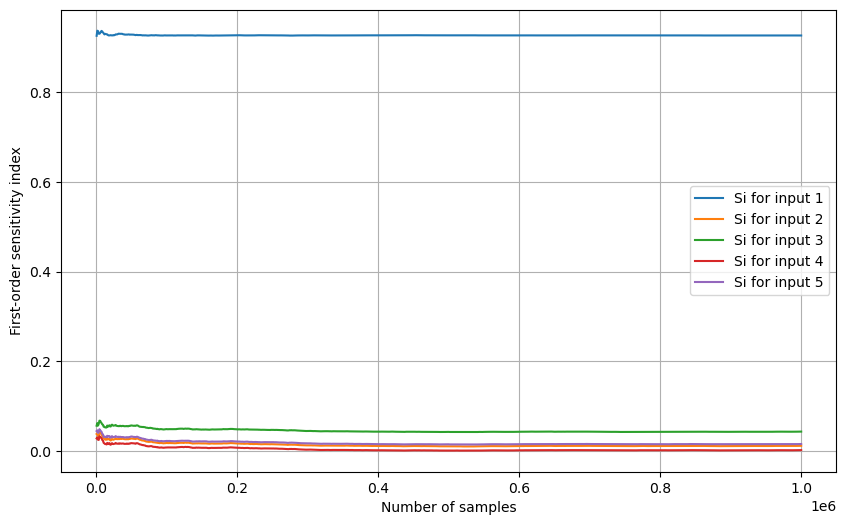

In [10]:
import matplotlib.pyplot as plt

# Define the number of iterations and the step size
n_iter = 1000
step_size = nS // n_iter

# Preallocate the array for the sensitivity indices
SiConvergence = np.zeros((n_iter, nX))

# Calculate the sensitivity indices for an increasing number of samples
for j in range(n_iter):
    n_samples = (j + 1) * step_size
    f0 = np.mean(yA[:n_samples])
    var_Y = np.var(yA[:n_samples])
    for i in range(nX):
        SiConvergence[j, i] = np.mean((yA[:n_samples] - f0) * (yC[:n_samples, i] - np.mean(yC[:n_samples, i]))) / var_Y

# Plot the convergence of the sensitivity indices
plt.figure(figsize=(10, 6))
for i in range(nX):
    plt.plot(range(step_size, nS + 1, step_size), SiConvergence[:, i], label=f'Si for input {i+1}')
plt.xlabel('Number of samples')
plt.ylabel('First-order sensitivity index')
plt.legend()
plt.grid(True)
plt.show()

## Question 3: Part d: Compute the Fussell-Vesely, Risk Achievement Worth, and Birnbaum importance measures for all the basic events as well as top events RT and HA

### I used the Minimal Cutsets from the BDD to avoid over complications

In [82]:
# Define the failure probabilities for the basic events
Pr_a = 0.03
Pr_b = 0.04
Pr_c = 0.05
Pr_d = 0.06
Pr_e = 0.07
Pr_f = Pr_g = 0.08
Pr_h1_I = Pr_h2_I = 0.0095
Pr_C_hh_12 = 5E-4
f_IE = 1E-3
Pr_RT = 0.01
Pr_HA = 0.02

# Calculate the complement of each basic event
Pr_a_bar = 1 - Pr_a
Pr_b_bar = 1 - Pr_b
Pr_c_bar = 1 - Pr_c
Pr_d_bar = 1 - Pr_d
Pr_e_bar = 1 - Pr_e
Pr_f_bar = 1 - Pr_f
Pr_g_bar = 1 - Pr_g

# Calculate the total risk for MD1 and MD2
F_x_MD1 = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e* Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
F_x_MD2 = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a_bar * Pr_b * Pr_c) + (Pr_a_bar * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_c) + (Pr_a * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)

F_x = F_x_MD1 + F_x_MD2

# Verify the total risk for MD1 and MD2
print(F_x_MD1)
print(F_x_MD2)


# Calculate the total risk when each basic event is set to 0 for MD1
MD1_0_a = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*0*Pr_b_bar) + (Pr_e_bar * 0 * Pr_b * Pr_c_bar) + (Pr_e_bar * 0 * Pr_b * Pr_c * Pr_d_bar) + (Pr_e* Pr_f_bar * 0 * Pr_b_bar) + (Pr_e * Pr_f_bar * 0 * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * 0 * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * 0) + (Pr_e * Pr_f * 0 * Pr_b_bar) + (Pr_e * Pr_f * 0 * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * 0 * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_b = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*0) + (Pr_e_bar * Pr_a * 0 * Pr_c_bar) + (Pr_e_bar * Pr_a * 0 * Pr_c * Pr_d_bar) + (Pr_e* Pr_f_bar * Pr_a * 0) + (Pr_e * Pr_f_bar * Pr_a * 0 * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * 0 * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * 0) + (Pr_e * Pr_f * Pr_a * 0 * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * 0 * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_c = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * 0) + (Pr_e_bar * Pr_a * Pr_b * 0 * Pr_d_bar) + (Pr_e* Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * 0) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * 0 * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * 0) + (Pr_e * Pr_f * Pr_a * Pr_b * 0 * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_d = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * 0) + (Pr_e* Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * 0) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * 0)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_e = f_IE * Pr_RT * Pr_HA * 0 *  ((1 - 0 * Pr_a * Pr_b_bar) + (1 - 0 * Pr_a * Pr_b * Pr_c_bar) + (1 - 0 * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (0 * Pr_f_bar * Pr_a * Pr_b_bar) + (0 * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (0 * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (0 * Pr_f * Pr_a_bar) + (0 * Pr_f * Pr_a * Pr_b_bar) + (0 * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (0 * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_f = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * 0 * Pr_a * Pr_b_bar) + (Pr_e * 0 * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * 0 * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * 0 * Pr_a_bar) + (Pr_e * 0 * Pr_a * Pr_b_bar) + (Pr_e * 0 * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * 0 * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_g = f_IE * Pr_RT * Pr_HA * 0 *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_HA = f_IE * Pr_RT * 0 * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_RT = f_IE * 0 * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_0_h1_I = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((0 + Pr_h2_I + Pr_C_hh_12) - (0 * Pr_h2_I))
MD1_0_h2_I = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + 0 + Pr_C_hh_12) - (Pr_h1_I * 0))
MD1_0_h_C_hh_12 = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + 0) - (Pr_h1_I * Pr_h2_I))

MD2_0_a = f_IE * Pr_RT * Pr_HA * Pr_g * ((0 * Pr_b * Pr_c) + (0 * Pr_b * Pr_c_bar * Pr_d) + (0 * Pr_c) + (0 * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_b = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * 0 * Pr_c) + (Pr_a * 0 * Pr_c_bar * Pr_d) + (Pr_a * Pr_c) + (Pr_a * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_c = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * 0) + (Pr_a * Pr_b * 0 * Pr_d) + (Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_d = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * 0) + (Pr_a * Pr_b * Pr_c * 0) + (Pr_a * Pr_b * Pr_c_bar * 0)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_e = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_f = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_g = f_IE * Pr_RT * Pr_HA * 0 * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_HA = f_IE * Pr_RT * 0 * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_RT = f_IE * 0 * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_0_h1_I = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (0 + Pr_h2_I + Pr_C_hh_12 - 0 * Pr_h2_I)
MD2_0_h2_I = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + 0 + Pr_C_hh_12 - Pr_h1_I * 0)
MD2_0_C_hh_12 = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + 0 - Pr_h1_I * Pr_h2_I)


# Calculate the total risk when each basic event is set to 1 for MD1
MD1_1_a = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*1*Pr_b_bar) + (Pr_e_bar * 1 * Pr_b * Pr_c_bar) + (Pr_e_bar * 1 * Pr_b * Pr_c * Pr_d_bar) + (Pr_e* Pr_f_bar * 1 * Pr_b_bar) + (Pr_e * Pr_f_bar * 1 * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * 1 * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * 1) + (Pr_e * Pr_f * 1 * Pr_b_bar) + (Pr_e * Pr_f * 1 * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * 1 * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_b = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*1) + (Pr_e_bar * Pr_a * 1 * Pr_c_bar) + (Pr_e_bar * Pr_a * 1 * Pr_c * Pr_d_bar) + (Pr_e* Pr_f_bar * Pr_a * 1) + (Pr_e * Pr_f_bar * Pr_a * 1 * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * 1 * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * 1) + (Pr_e * Pr_f * Pr_a * 1 * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * 1 * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_c = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * 1) + (Pr_e_bar * Pr_a * Pr_b * 1 * Pr_d_bar) + (Pr_e* Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * 1) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * 1 * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * 1) + (Pr_e * Pr_f * Pr_a * 1 * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_d = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar*Pr_a*Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * 1) + (Pr_e* Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * 1) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * 1)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_e = f_IE * Pr_RT * Pr_HA * 0 *  ((1 - 1 * Pr_a * Pr_b_bar) + (1 - 1 * Pr_a * Pr_b * Pr_c_bar) + (1 - 1 * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (1 * Pr_f_bar * Pr_a * Pr_b_bar) + (1 * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (1 * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (1 * Pr_f * Pr_a_bar) + (1 * Pr_f * Pr_a * Pr_b_bar) + (1 * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (1 * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_f = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * 1 * Pr_a * Pr_b_bar) + (Pr_e * 1 * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * 1 * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * 1 * Pr_a_bar) + (Pr_e * 1 * Pr_a * Pr_b_bar) + (Pr_e * 1 * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * 1 * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_g = f_IE * Pr_RT * Pr_HA * 0 *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_HA = f_IE * Pr_RT * 0 * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_RT = f_IE * 0 * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + Pr_C_hh_12) - (Pr_h1_I * Pr_h2_I))
MD1_1_h1_I = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((1 + Pr_h2_I + Pr_C_hh_12) - (1 * Pr_h2_I))
MD1_1_h2_I = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + 1 + Pr_C_hh_12) - (Pr_h1_I * 1))
MD1_1_C_hh_12 = f_IE * Pr_RT * Pr_HA * Pr_g *  ((Pr_e_bar * Pr_a * Pr_b_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f_bar * Pr_a * Pr_b * Pr_c * Pr_d_bar) + (Pr_e * Pr_f * Pr_a_bar) + (Pr_e * Pr_f * Pr_a * Pr_b_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c_bar) + (Pr_e * Pr_f * Pr_a * Pr_b * Pr_c * Pr_d_bar)) * ((Pr_h1_I + Pr_h2_I + 1) - (Pr_h1_I * Pr_h2_I))

MD2_1_a = f_IE * Pr_RT * Pr_HA * Pr_g * ((1 * Pr_b * Pr_c) + (1 * Pr_b * Pr_c_bar * Pr_d) + (1 * Pr_c) + (1 * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_b = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * 1 * Pr_c) + (Pr_a * 1 * Pr_c_bar * Pr_d) + (Pr_a * Pr_c) + (Pr_a * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_c = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * 1) + (Pr_a * Pr_b * 1 * Pr_d) + (Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_d = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * 1) + (Pr_a * Pr_b * Pr_c * 1) + (Pr_a * Pr_b * Pr_c_bar * 1)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_e = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_f = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_g = f_IE * Pr_RT * Pr_HA * 0 * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_HA = f_IE * Pr_RT * 0 * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_RT = f_IE * 0 * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + Pr_C_hh_12 - Pr_h1_I * Pr_h2_I)
MD2_1_h1_I = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (1 + Pr_h2_I + Pr_C_hh_12 - 1 * Pr_h2_I)
MD2_1_h2_I = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + 1 + Pr_C_hh_12 - Pr_h1_I * 1)
MD2_1_C_hh_12 = f_IE * Pr_RT * Pr_HA * Pr_g * ((Pr_a * Pr_b * Pr_c) + (Pr_a * Pr_b * Pr_c_bar * Pr_d) + (Pr_a * Pr_b * Pr_c * Pr_d) + (Pr_a * Pr_b * Pr_c_bar * Pr_d)) * (Pr_h1_I + Pr_h2_I + 1 - Pr_h1_I * Pr_h2_I)


# Define the total risk equations when each basic event is set to 0 for both MD1 and MD2
F_x_0_a = MD1_0_a + MD2_0_a
F_x_0_b = MD1_0_b + MD2_0_b
F_x_0_c = MD1_0_c + MD2_0_c
F_x_0_d = MD1_0_d + MD2_0_d
F_x_0_e = MD1_0_e + MD2_0_e
F_x_0_f = MD1_0_f + MD2_0_f
F_x_0_g = MD1_0_g + MD2_0_g
F_x_0_HA = MD1_0_HA + MD2_0_HA
F_x_0_RT = MD1_0_RT + MD2_0_RT
F_x_0_h_1_I = MD1_0_h1_I + MD2_0_h1_I
F_x_0_h_2_I = MD1_0_h2_I + MD2_0_h2_I
F_x_0_h_C_hh_12 = MD1_0_h_C_hh_12 + MD2_0_C_hh_12

# Define the total risk equations when each basic event is set to 1 for both MD1 and MD2
F_x_1_a = MD1_1_a + MD2_1_a
F_x_1_b = MD1_1_b + MD2_1_b
F_x_1_c = MD1_1_c + MD2_1_c
F_x_1_d = MD1_1_d + MD2_1_d
F_x_1_e = MD1_1_e + MD2_1_e
F_x_1_f = MD1_1_f + MD2_1_f
F_x_1_g = MD1_1_g + MD2_1_g
F_x_1_HA = MD1_1_HA + MD2_1_HA
F_x_1_RT = MD1_1_RT + MD2_1_RT
F_x_1_h_1_I = MD1_1_h1_I + MD2_1_h1_I
F_x_1_h_2_I = MD1_1_h2_I + MD2_1_h2_I
F_x_1_C_hh_12 = MD1_1_C_hh_12 + MD2_1_C_hh_12

# Calculate the Fussell-Vesely importance measure for each basic event
FV_a = (F_x - F_x_0_a) / F_x
FV_e = (F_x - F_x_0_e) / F_x
FV_f = (F_x - F_x_0_f) / F_x
FV_g = (F_x - F_x_0_g) / F_x
FV_HA = (F_x - F_x_0_HA) / F_x
FV_RT = (F_x - F_x_0_RT) / F_x
FV_h1_I = (F_x - F_x_0_h_1_I) / F_x
FV_h2_I = (F_x - F_x_0_h_2_I) / F_x
FV_C_hh_12 = (F_x - F_x_0_h_C_hh_12) / F_x

# Calculate the Risk Achievement Worth for each basic event
RAW_a = F_x_1_a / F_x
RAW_b = F_x_1_b / F_x
RAW_c = F_x_1_c / F_x
RAW_d = F_x_1_d / F_x
RAW_e = F_x_1_e / F_x
RAW_f = F_x_1_f / F_x
RAW_g = F_x_1_g / F_x
RAW_HA = F_x_1_HA / F_x
RAW_RT = F_x_1_RT / F_x
RAW_h_1_I = F_x_1_h_1_I / F_x
RAW_h_2_I = F_x_1_h_2_I / F_x
RAW_C_hh_12 = F_x_1_C_hh_12 / F_x

# Calculate the Birnbaum importance measure for each basic event
Birnbaum_a = (F_x_1_a - F_x_0_a) / 1
Birnbaum_b = (F_x_1_b - F_x_0_b) / 1
Birnbaum_c = (F_x_1_c - F_x_0_c) / 1
Birnbaum_d = (F_x_1_d - F_x_0_d) / 1
Birnbaum_e = (F_x_1_e - F_x_0_e) / 1
Birnbaum_f = (F_x_1_f - F_x_0_f) / 1
Birnbaum_g = (F_x_1_g - F_x_0_g) / 1
Birnbaum_HA = (F_x_1_HA - F_x_0_HA) / 1
Birnbaum_RT = (F_x_1_RT - F_x_0_RT) / 1
Birnbaum_h_1_I = (F_x_1_h_1_I - F_x_0_h_1_I) / 1
Birnbaum_h_2_I = (F_x_1_h_2_I - F_x_0_h_2_I) / 1
Birnbaum_C_hh_12 = (F_x_1_C_hh_12 - F_x_0_h_C_hh_12) / 1

# Print the results
print(f'FV_a: {FV_a}')
print(f'FV_e: {FV_e}')
print(f'FV_f: {FV_f}')
print(f'FV_g: {FV_g}')
print(f'FV_HA: {FV_HA}')
print(f'FV_RT: {FV_RT}')
print(f'FV_h1_I: {FV_h1_I}')
print(f'FV_h2_I: {FV_h2_I}')
print(f'FV_C_hh_12: {FV_C_hh_12}')

# Print the Risk Achievement Worth for each basic event
print("RAW_a =", RAW_a)
print("RAW_b =", RAW_b)
print("RAW_c =", RAW_c)
print("RAW_d =", RAW_d)
print("RAW_e =", RAW_e)
print("RAW_f =", RAW_f)
print("RAW_g =", RAW_g)
print("RAW_HA =", RAW_HA)
print("RAW_RT =", RAW_RT)
print("RAW_h_1_I =", RAW_h_1_I)
print("RAW_h_2_I =", RAW_h_2_I)
print("RAW_C_hh_12 =", RAW_C_hh_12)

# Print the Birnbaum importance measure for each basic event
print("Birnbaum_a =", Birnbaum_a)
print("Birnbaum_b =", Birnbaum_b)
print("Birnbaum_c =", Birnbaum_c)
print("Birnbaum_d =", Birnbaum_d)
print("Birnbaum_e =", Birnbaum_e)
print("Birnbaum_f =", Birnbaum_f)
print("Birnbaum_g =", Birnbaum_g)
print("Birnbaum_HA =", Birnbaum_HA)
print("Birnbaum_RT =", Birnbaum_RT)
print("Birnbaum_h_1_I =", Birnbaum_h_1_I)
print("Birnbaum_h_2_I =", Birnbaum_h_2_I)
print("Birnbaum_C_hh_12 =", Birnbaum_C_hh_12)

1.10025021904e-11
2.2861890496000002e-12
FV_a: 1.0
FV_e: 0.9953166627716756
FV_f: 0.34337340500116853
FV_g: 1.0
FV_HA: 1.0
FV_RT: 1.0
FV_h1_I: 0.5710181012528365
FV_h2_I: 0.5710181012528365
FV_C_hh_12: 0.1888059540165822
RAW_a = 26.098621173171303
RAW_b = 1.6770740827296096
RAW_c = 0.8929301986445431
RAW_d = 0.8841318064968449
RAW_e = 0.004683337228324375
RAW_f = 2.341587941107736
RAW_g = 0.0
RAW_HA = 0.0
RAW_RT = 0.0
RAW_h_1_I = 42.91963896965372
RAW_h_2_I = 42.91963896965372
RAW_C_hh_12 = 43.709383920699786
Birnbaum_a = 3.4681651856e-10
Birnbaum_b = 1.9602294719999998e-11
Birnbaum_c = 1.2151693550591998e-12
Birnbaum_d = 7.453344000000005e-13
Birnbaum_e = 0.0
Birnbaum_f = 2.2390931079776007e-11
Birnbaum_g = 0.0
Birnbaum_HA = 0.0
Birnbaum_RT = 0.0
Birnbaum_h_1_I = 5.646452223999999e-10
Birnbaum_h_2_I = 5.646452223999999e-10
Birnbaum_C_hh_12 = 5.700608e-10


# Based on the provided data, here are some conclusions we can draw:

FV-IM (Failure Probability Reduction Importance Measure): The basic events 'a', 'g', 'HA', and 'RT' have the highest FV-IM values (1.0), indicating that reducing their failure probabilities contributes the most to system risk reduction. A decrease in the failure probability of that component will result in a significant decrease in the overall system risk. In other words, improving the reliability of that component (making it less likely to fail) will have a large impact on improving the overall system reliability. On the other hand, 'f' and 'C_hh_12' have the lowest FV-IM values, suggesting that their failure probabilities have less impact on the system risk. 

RAW (Risk Achievement Worth): The basic events 'h_1_I', 'h_2_I', and 'C_hh_12' have the highest RAW values, indicating that returning these components to service is most important for reducing system risk. 'g', 'HA', and 'RT' have RAW values of 0, suggesting that their availability does not affect the system risk.

Birnbaum Importance Measure: The basic events 'a', 'h_1_I', 'h_2_I', and 'C_hh_12' have the highest Birnbaum values, indicating that they have the least functional redundancy or margin. 'e', 'g', 'HA', and 'RT' have Birnbaum values of 0, suggesting that they have a high degree of functional redundancy or margin. Redundancy in a system refers to the existence of backup components that can take over if a primary component fails. A system with high redundancy is more reliable because it can continue to function even when some components fail. The term "margin" in this context refers to the "buffer" or "extra capacity" a system has to handle failures. A system with a high margin can tolerate more failures before the overall system fails. When we say a component has a high degree of functional redundancy or margin, it means that even if this component fails, there are other components that can take over its function, or the system has enough capacity to handle the failure of this component.

In summary, the basic events 'a', 'h_1_I', 'h_2_I', and 'C_hh_12' appear to be the most critical for system risk, as they have high values for FV-IM, RAW, and Birnbaum measures. The basic events 'g', 'HA', and 'RT' seem to have less impact on system risk, as indicated by their low RAW and Birnbaum values and high FV-IM values.